In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os

#global varibals
e1=e2=e3=p_0=r1=r2=p_beta0=f_xx_0=0.0
f_i=f_x_i=f_xx_i=f_xxx_i=f_i_1=f_x_i_1=f_xx_i_1=f_xxx_i_1=h=gamma=x=0.0
i=ii=iiwake=0
f=[0]*4002
f_x=[0]*4002
f_xx=[0]*4002
f_xxx=[0]*4002
f_ii=[0]*6
f_x_ii=[0]*6
Q=[0]*4002
p_beta=[0]*4002
p_iiwake=[0]*16

#subfunction bilp
def blip(beta):
    global e1,e2,e3,h,f_i,f_x_i,f_xx_i,f_xxx_i,gamma,f_i_1,f_x_i_1,f_xx_i_1,f_xxx_i_1,x,p_beta0,f_xx_0,p_0,r1,r2
    global i,ii,iiwake
    global f,f_x,f_xx,f_xxx,f_ii,f_x_ii,Q,p_beta,p_iiwake
    k=0
    p=r1+r2
    Q[1]=0.
    Q[2]=0.
    #guess the initial value of Q and p
    while True:
        f[i]=f_i
        f_x[i]=f_x_i
        f_xx[i]=f_xx_i
        f_xxx[i]=f_xxx_i
        #put the value of f_i, f'_i, f''_i, f'''_i into the array
        i=i+1
        x=(i-1.)*h
        accumulator_0=0.
        #the accumulator used for the integration in the following loop
        if i>2:
            for k in range(2,i-1+1,1): 
                s=(k-1.)*h
                accumulator_0=accumulator_0+f_x[k]*(x-s)**(1./3.)
            accumulator_0=accumulator_0*h
            Q[i]=-gamma*accumulator_0
            #do the first integration
            accumulator_1=0.
            #the accumulator used for the integration in the following loop
            for k in range(2,i-1+1,1):
                s=(k-1.)*h
                es=math.exp(beta*(x-s))
                accumulator_1=accumulator_1+Q[k]*(es-1./es)*h
            ee=math.exp(beta*x)
            p=Q[i]+beta/2.*accumulator_1+r1*ee+r2/ee
            #do the second integration
        f_i_1=f_i+h*f_x_i
        f_x_i_1=f_x_i+h*f_xx_i
        f_xx_i_1=f_xx_i+h*f_xxx_i
        f_xxx_i_1=f_xxx_i+h*(p-p_beta0-e2*f_xx_i-e3*f_i)/e1
        #update the value of f_i, f'_i, f''_i, f'''_i
        f_i=f_i_1
        f_x_i=f_x_i_1
        f_xx_i=f_xx_i_1
        f_xxx_i=f_xxx_i_1
        #put the updated f_i, f'_i, f''_i, f'''_i into the array
        p_beta[i]=p
        #put p_i into the array
        f[i]=f_i_1
        f_x[i]=f_x_i_1
        if i==ii:
            break



#subfunction wake
def wake(beta):
    global e1,e2,e3,h,f_i,f_x_i,f_xx_i,f_xxx_i,gamma,f_i_1,f_x_i_1,f_xx_i_1,f_xxx_i_1,x,p_beta0,f_xx_0,p_0,r1,r2
    global i,ii,iiwake
    global f,f_x,f_xx,f_xxx,f_ii,f_x_ii,Q,p_beta,p_iiwake
    k=0
    while True:
        i=i+1
        x=(i-1.)*h
        accumulator_0=0.
        for k in range(2,ii-1+1,1):
            s=(k-1.)*h
            accumulator_0=accumulator_0+f_x[k]*(x-s)**(1./3.)
        accumulator_0=accumulator_0*h
        #the accumulator used for the integration in the following loop
        Q[int(i)]=-gamma*accumulator_0
        accumulator_1=0.
        #the accumulator used for the integration in the following loop
        for k in range(2,i-1+1,1):
            s=(k-1.)*h
            es=math.exp(beta*(x-s))
            accumulator_1=accumulator_1+Q[k]*(es-1./es)*h
        ee=math.exp(beta*x)
        p=Q[int(i)]+beta/2.*accumulator_1+r1*ee+r2/ee
        #do the iteration
        p_beta[int(i)]=p
        #put p_i into the array
        if i==iiwake:
            break
    
#main function
def OutFile(beta,lam,dlam,lamax,filename):
    global e1,e2,e3,h,f_i,f_x_i,f_xx_i,f_xxx_i,gamma,f_i_1,f_x_i_1,f_xx_i_1,f_xxx_i_1,x,p_beta0,f_xx_0,p_0,r1,r2
    global i,ii,iiwake
    global f,f_x,f_xx,f_xxx,f_ii,f_x_ii,Q,p_beta,p_iiwake
    p_0=0.
    dg=0.1
    ng=1
    p_01=p_0

    ii=501
    h=1./(ii-1.)
    iiwake=3001
    imid=(ii+1)/2

    e1=-1.
    e2=-2.*beta**2*e1
    e3=beta**4*e1
    p_beta0=1.
    
    #initialisation and giving values to constants

    fso = open(filename,'w')
    while True:
        ng=1
        p_01=p_0
        #set initial guess of p_0
        while True:
            r1=p_0
            r2=0.
            for i in range(1,iiwake+1,1):
                p_beta[i]=p_0
                f[i]=0.
            gamma=0.289838*3.*(lam)**(5./3.)
            f_xx_0=1.
            df_xx_0=0.1
            f_xx_01=f_xx_0
            n=1
            #set initial guess value of f''(0)
            while True:
                f_xxx_0=-4.5
                df_xxx_0=0.1
                f_xxx_01=f_xxx_0
                m=1
                #set initial guess value of f'''(0)
                while True:
                    f_i=0.
                    f_x_i=0.
                    f_xx_i=f_xx_0
                    f_xxx_i=f_xxx_0
                    i=1
                                    
                    blip(beta)

                    f_ii[m]=f_i_1
                    m=m+1
                    if m==2:
                        f_xxx_0=f_xxx_0+df_xxx_0
                        f_xxx_02=f_xxx_0
                    elif m==3:
                        f_xxx_0=(f_xxx_01*f_ii[2]-f_xxx_02*f_ii[1])/(f_ii[2]-f_ii[1])
                    if m>3:
                        break
                    #update f'''(0)

                f_x_ii[n]=f_x_i_1
                n=n+1
                if n==2:
                    f_xx_0=f_xx_0+df_xx_0
                    f_xx_02=f_xx_0
                if n==3:
                    f_xx_0=(f_xx_01*f_x_ii[2]-f_xx_02*f_x_ii[1])/(f_x_ii[2]-f_x_ii[1])
                if n>3:
                    break
                #update f''(0)

            i=ii
            wake(beta)
            p_iiwake[ng]=p_beta[iiwake]
            ng=ng+1
            if ng==2:
                p_0=p_0+dg
                p_02=p_0
            if ng==3:
                p_0=(p_01*p_iiwake[2]-p_02*p_iiwake[1])/(p_iiwake[2]-p_iiwake[1])
            if ng>3:
                break
            #update p_0
   
        for i in range(1,iiwake+1,1):
            x=(i-1.)*h
            fso.write('%18.9e%18.9e%18.9e\n' %(x,f[i],p_beta[i]))
            #record f, p_beta
            
        lam=lam+dlam
        if lam>lamax:
            break
        #update lambda

    fso.close()

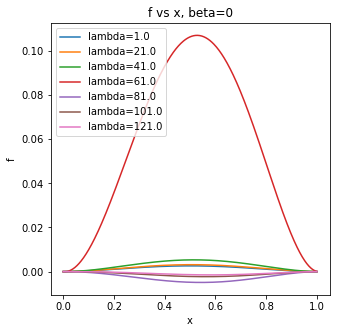

In [2]:
beta = 0.0
lam = 1.0
dlam = 20.0
lamax = 121.0
dataname = 'beta 0.txt'
if __name__ == '__main__' :
    OutFile(beta, lam, dlam, lamax, dataname)
data = np.loadtxt(dataname)
xaxis = data[0:501,0]
lams = np.arange(lam, lamax + dlam, dlam)
plt.figure(figsize=(5,5))
for i in range(len(lams)):
    legend = 'lambda=' + str(i * dlam + lam)
    plt.plot(xaxis, data[3000 * i : 3000 * i + 501, 1],label = legend)
plt.legend(loc = 'upper left')
plt.title('f vs x, beta=0')
plt.xlabel('x')
plt.ylabel('f')
plt.savefig('f vs x, beta=0')
plt.show()

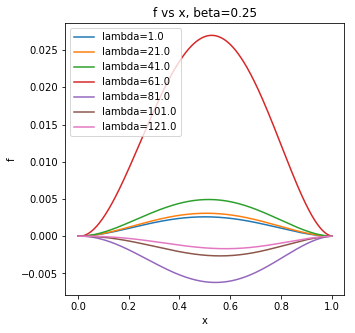

In [3]:
beta = 0.25
lam = 1.0
dlam = 20.0
lamax = 121.0
dataname = 'beta 025.txt'
if __name__ == '__main__' :
    OutFile(beta, lam, dlam, lamax, dataname)
data = np.loadtxt(dataname)
xaxis = data[0:501,0]
lams = np.arange(lam, lamax + dlam, dlam)
plt.figure(figsize=(5,5))
for i in range(len(lams)):
    legend = 'lambda=' + str(i * dlam + lam)
    plt.plot(xaxis, data[3000 * i : 3000 * i + 501, 1],label = legend)
plt.legend(loc = 'upper left')
plt.title('f vs x, beta=0.25')
plt.xlabel('x')
plt.ylabel('f')
plt.savefig('f vs x, beta=025')
plt.show()

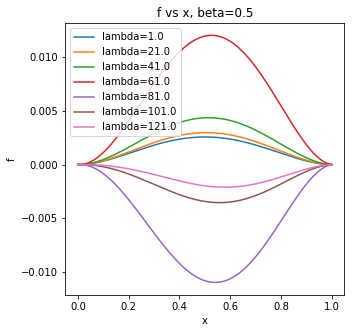

In [4]:
beta = 0.5
lam = 1.0
dlam = 20.0
lamax = 121.0
dataname = 'beta 05.txt'
if __name__ == '__main__' :
    OutFile(beta, lam, dlam, lamax, dataname)
data = np.loadtxt(dataname)
xaxis = data[0:501,0]
lams = np.arange(lam, lamax + dlam, dlam)
plt.figure(figsize=(5,5))
for i in range(len(lams)):
    legend = 'lambda=' + str(i * dlam + lam)
    plt.plot(xaxis, data[3000 * i : 3000 * i + 501, 1],label = legend)
plt.legend(loc = 'upper left')
plt.title('f vs x, beta=0.5')
plt.xlabel('x')
plt.ylabel('f')
plt.savefig('f vs x, beta=05')
plt.show()

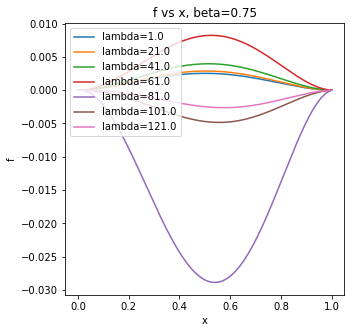

In [5]:
beta = 0.75
lam = 1.0
dlam = 20.0
lamax = 121.0
dataname = 'beta 075.txt'
if __name__ == '__main__' :
    OutFile(beta, lam, dlam, lamax, dataname)
data = np.loadtxt(dataname)
xaxis = data[0:501,0]
lams = np.arange(lam, lamax + dlam, dlam)
plt.figure(figsize=(5,5))
for i in range(len(lams)):
    legend = 'lambda=' + str(i * dlam + lam)
    plt.plot(xaxis, data[3000 * i : 3000 * i + 501, 1],label = legend)
plt.legend(loc = 'upper left')
plt.title('f vs x, beta=0.75')
plt.xlabel('x')
plt.ylabel('f')
plt.savefig('f vs x, beta=075')
plt.show()

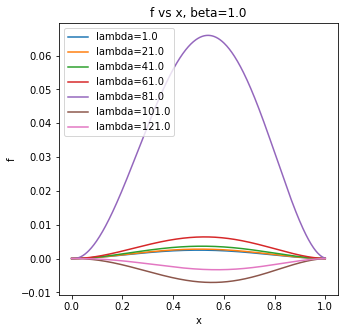

In [6]:
beta = 1.0
lam = 1.0
dlam = 20.0
lamax = 121.0
dataname = 'beta 1.txt'
if __name__ == '__main__' :
    OutFile(beta, lam, dlam, lamax, dataname)
data = np.loadtxt(dataname)
xaxis = data[0:501,0]
lams = np.arange(lam, lamax + dlam, dlam)
plt.figure(figsize=(5,5))
for i in range(len(lams)):
    legend = 'lambda=' + str(i * dlam + lam)
    plt.plot(xaxis, data[3000 * i : 3000 * i + 501, 1],label = legend)
plt.legend(loc = 'upper left')
plt.title('f vs x, beta=1.0')
plt.xlabel('x')
plt.ylabel('f')
plt.savefig('f vs x, beta=1')
plt.show()

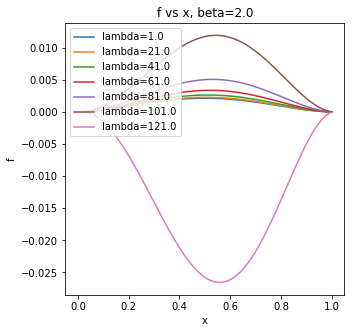

In [7]:
beta = 2.0
lam = 1.0
dlam = 20.0
lamax = 121.0
dataname = 'beta 2.txt'
if __name__ == '__main__' :
    OutFile(beta, lam, dlam, lamax, dataname)
data = np.loadtxt(dataname)
xaxis = data[0:501,0]
lams = np.arange(lam, lamax + dlam, dlam)
plt.figure(figsize=(5,5))
for i in range(len(lams)):
    legend = 'lambda=' + str(i * dlam + lam)
    plt.plot(xaxis, data[3000 * i : 3000 * i + 501, 1],label = legend)
plt.legend(loc = 'upper left')
plt.title('f vs x, beta=2.0')
plt.xlabel('x')
plt.ylabel('f')
plt.savefig('f vs x, beta=2')
plt.show()

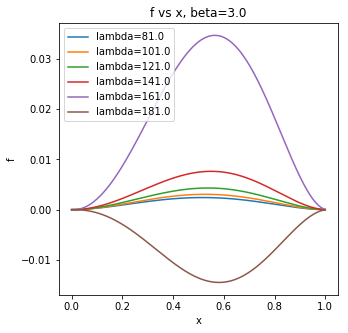

In [8]:
beta = 3.0
lam = 81.0
dlam = 20.0
lamax = 181.0
dataname = 'beta 3.txt'
if __name__ == '__main__' :
    OutFile(beta, lam, dlam, lamax, dataname)
data = np.loadtxt(dataname)
xaxis = data[0:501,0]
lams = np.arange(lam, lamax + dlam, dlam)
plt.figure(figsize=(5,5))
for i in range(len(lams)):
    legend = 'lambda=' + str(i * dlam + lam)
    plt.plot(xaxis, data[3000 * i : 3000 * i + 501, 1],label = legend)
plt.legend(loc = 'upper left')
plt.title('f vs x, beta=3.0')
plt.xlabel('x')
plt.ylabel('f')
plt.savefig('f vs x, beta=3')
plt.show()

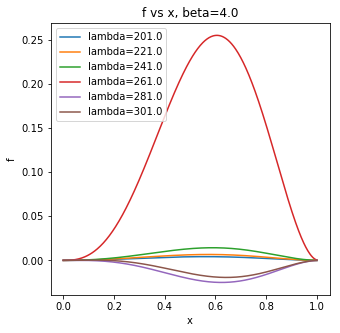

In [9]:
beta = 4.0
lam = 201.0
dlam = 20.0
lamax = 301.0
dataname = 'beta 4.txt'
if __name__ == '__main__' :
    OutFile(beta, lam, dlam, lamax, dataname)
data = np.loadtxt(dataname)
xaxis = data[0:501,0]
lams = np.arange(lam, lamax + dlam, dlam)
plt.figure(figsize=(5,5))
for i in range(len(lams)):
    legend = 'lambda=' + str(i * dlam + lam)
    plt.plot(xaxis, data[3000 * i : 3000 * i + 501, 1],label = legend)
plt.legend(loc = 'upper left')
plt.title('f vs x, beta=4.0')
plt.xlabel('x')
plt.ylabel('f')
plt.savefig('f vs x, beta=4')
plt.show()

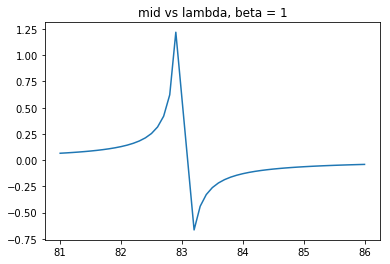

In [10]:
ss = 1.0
rlam = 81.0
dr = 0.1
rmax = 82.9
dataname = 'beta1_front.txt'
if __name__ == '__main__' :
    OutFile(ss, rlam, dr, rmax, dataname)
data = np.loadtxt(dataname)
xaxis = data[0:501,0]
lams1 = np.arange(rlam, rmax + dr, dr)
plt.figure()
midarrayy = np.array([])
for i in range(len(lams1)):
    midarrayy = np.append(midarrayy,data[3000 * i + 251, 1])
rlam = 83.2
dr = 0.1
rmax = 86.0
dataname = 'beta1_back.txt'
if __name__ == '__main__' :
    OutFile(ss, rlam, dr, rmax, dataname)
data = np.loadtxt(dataname)
xaxis = data[0:501,0]
lams2 = np.arange(rlam, rmax + dr, dr)
for i in range(len(lams2)):
    midarrayy = np.append(midarrayy,data[3000 * i + 251, 1])
lamssss = np.append(lams1,lams2)
plt.plot(lamssss,midarrayy)
plt.title('mid vs lambda, beta = 1')
plt.show()

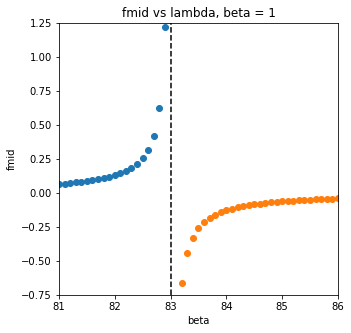

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(lamssss[0:20],midarrayy[0:20])
plt.scatter(lamssss[20:49],midarrayy[20:49])
plt.title('fmid vs lambda, beta = 1')
plt.xlim(81,86)
plt.ylim(-0.75,1.25)
plt.vlines(83, -0.75, 1.25, colors = "black", linestyles = "dashed")
plt.xlabel('beta')
plt.ylabel('fmid')
plt.savefig('1')
plt.show()

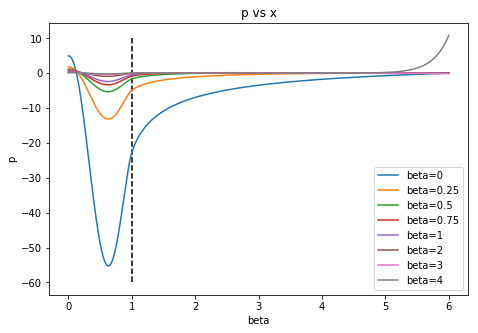

In [12]:
b = np.array([0.,0.25,0.5,0.75,1.,2.,3.,4.])
a=0
for beta in b:
    dataname='data'+str(a)+'.txt'
    lam = 61.0
    dlam = 20.0
    lamax = 81.0
    if __name__ == '__main__' :
        OutFile(beta, lam, dlam, lamax, dataname)
        a=a+1
data0 = np.loadtxt('data0.txt')
data025 = np.loadtxt('data1.txt')
data05 = np.loadtxt('data2.txt')
data075 = np.loadtxt('data3.txt')
data1 = np.loadtxt('data4.txt')
data2 = np.loadtxt('data5.txt')
data3 = np.loadtxt('data6.txt')
data4 = np.loadtxt('data7.txt')
xaxis = data[0:3000,0]
plt.figure(figsize=(7.5,5))
plt.plot(xaxis, data0[3001 * 0+1 : 3001 * 0 + 3001, 2],label = 'beta=0')
plt.plot(xaxis, data025[3001 * 0+1 : 3001 * 0 + 3001, 2],label = 'beta=0.25')
plt.plot(xaxis, data05[3001 * 0+1 : 3001 * 0 + 3001, 2],label = 'beta=0.5')
plt.plot(xaxis, data075[3001 * 0+1 : 3001 * 0 + 3001, 2],label = 'beta=0.75')
plt.plot(xaxis, data1[3001 * 0+1 : 3001 * 0 + 3001, 2],label = 'beta=1')
plt.plot(xaxis, data2[3001 * 0+1 : 3001 * 0 + 3001, 2],label = 'beta=2')
plt.plot(xaxis, data3[3001 * 0+1 : 3001 * 0 + 3001, 2],label = 'beta=3')
plt.plot(xaxis, data4[3001 * 0+1 : 3001 * 0 + 3001, 2],label = 'beta=4')
plt.title('p vs x')
plt.xlabel('beta')
plt.ylabel('p')
plt.legend(loc = 'lower right')
plt.vlines(1, -60, 10, colors = "black", linestyles = "dashed")
plt.savefig('2')
plt.show()
